## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import os, sys
sys.path.insert(1, os.path.relpath("../functions"))
from fitting import *
from plotting import *


_FOLDER = "../data/"
_FOLDER_2 = "../figures/"
_FOLDER_3 = "../results/"

## Fitting data

In [2]:
df = pd.read_csv(_FOLDER_3+"filt_auc_02.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'auc', 'spearman_r', 'count_missing'],
      dtype='object')

### sigmoid_4_param

In [3]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 12169/12169 [01:30<00:00, 134.69it/s]

<function sigmoid_4_param at 0x7fd0252d2b70>
R2>0: (11343, 33)
R2>0.9 10412
Number of samples with fitting <0.1: 524

CPU times: user 1min 26s, sys: 6.12 s, total: 1min 32s
Wall time: 1min 30s


Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


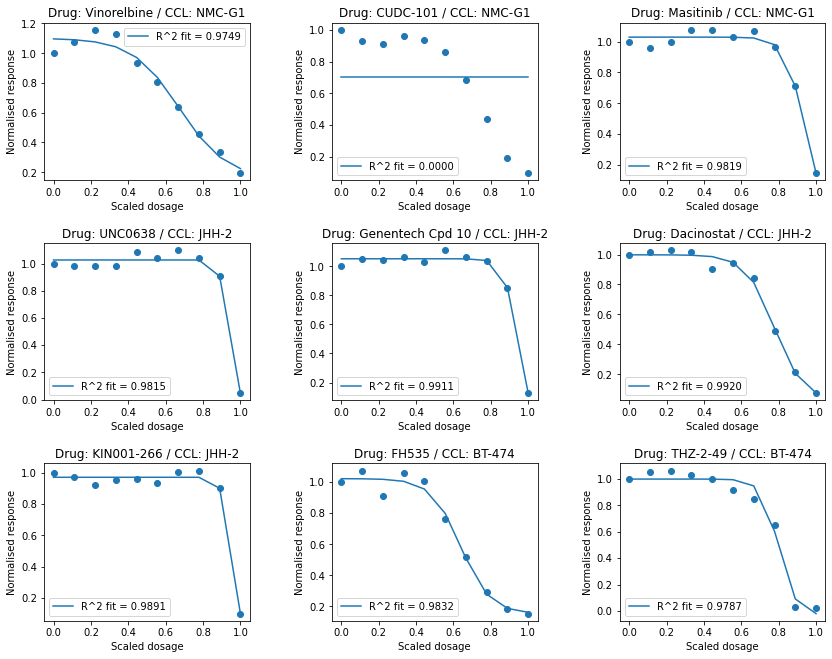

In [4]:
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_2_param

100%|██████████| 11343/11343 [00:19<00:00, 583.54it/s]


<function sigmoid_2_param at 0x7fd0252d27b8>
R2>0: (11343, 35)
R2>0.9 9497
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 19.3 s, sys: 822 ms, total: 20.2 s
Wall time: 19.8 s


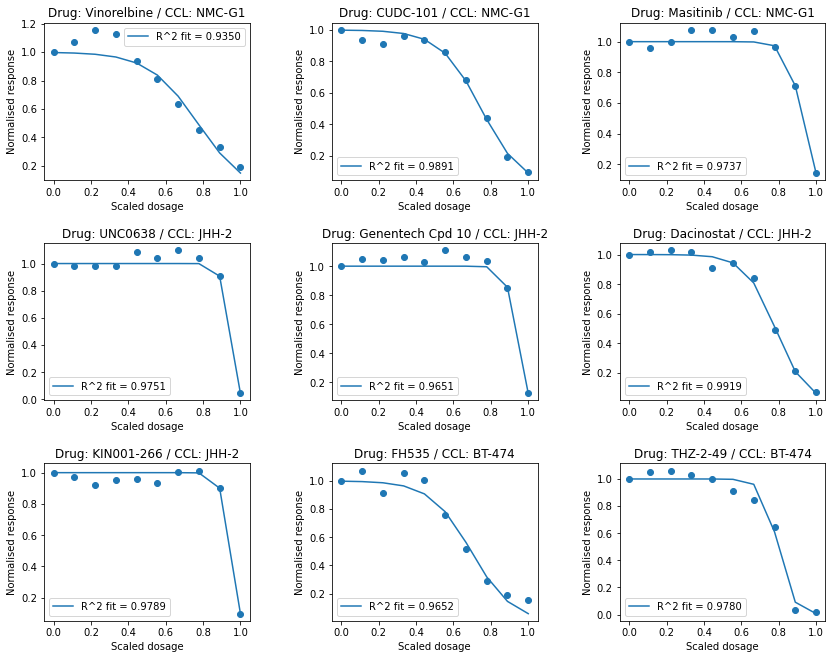

In [5]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 11343/11343 [00:34<00:00, 329.41it/s]


<function sigmoid_3_param at 0x7fd0252d2ae8>
R2>0: (11334, 37)
R2>0.9 10563
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 33.5 s, sys: 1.4 s, total: 34.9 s
Wall time: 34.8 s


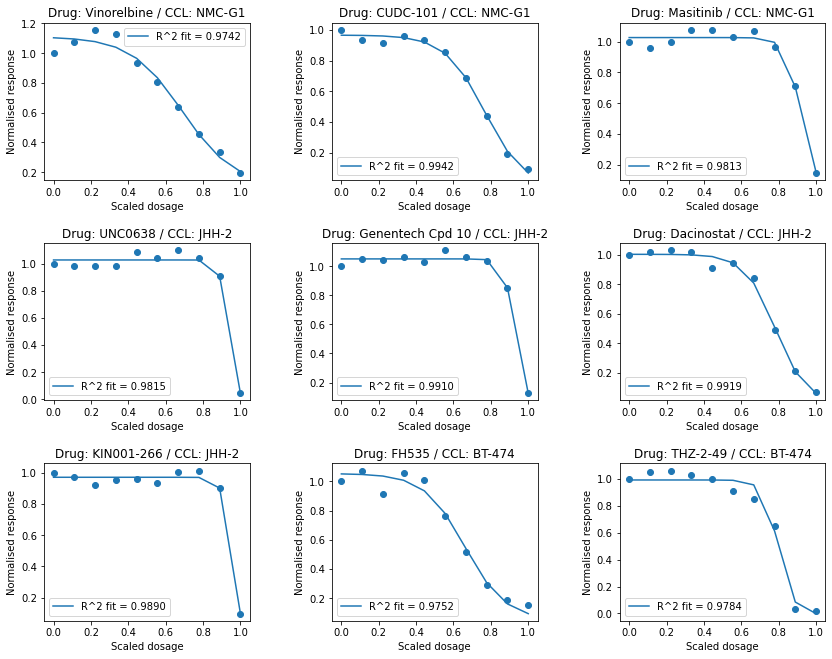

In [6]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 11334/11334 [00:26<00:00, 420.00it/s]


<function fsigmoid at 0x7fd0252d2a60>
(11334, 39)
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)


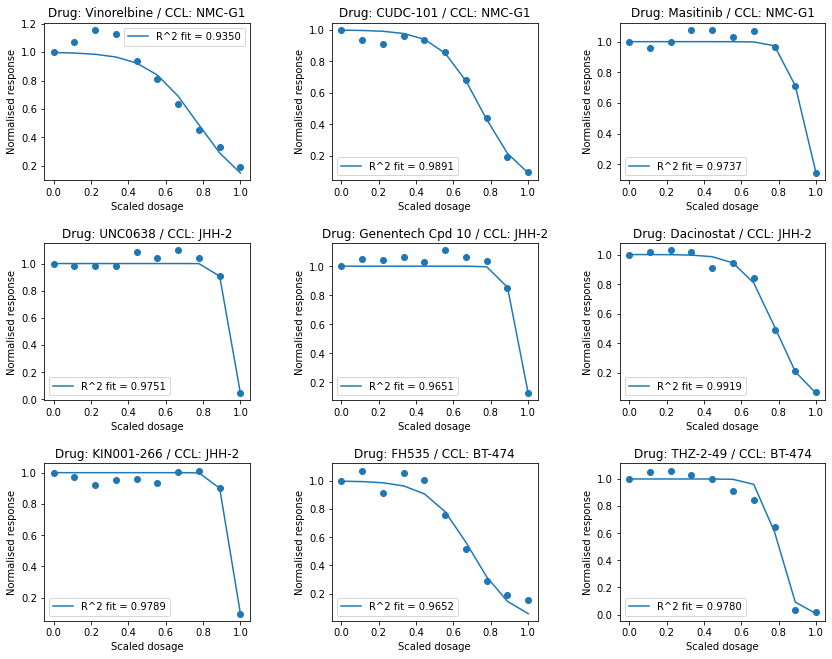

In [7]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 11334/11334 [00:46<00:00, 245.29it/s]


<function logistic_4_param at 0x7fd0252d2d08>
R2>0: (11331, 41)
R2>0.9 10841
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 44.8 s, sys: 2.29 s, total: 47.1 s
Wall time: 46.5 s


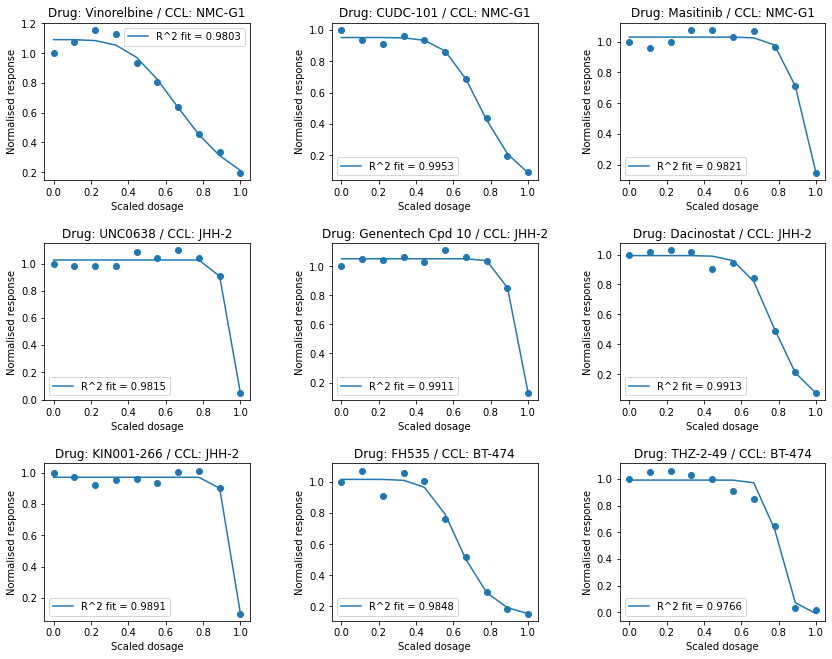

In [8]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

In [9]:
df[df["logistic_4_param_r2"]>0.9][["logistic_4_param", "logistic_4_param_r2"]]

,logistic_4_param,logistic_4_param_r2
1,"[1.0907829029342455, 4.37405617935342, 0.71688...",0.980306
2,"[0.9519836581555603, 7.388688379082729, 0.7625...",0.995272
3,"[1.029750341406344, 15.444637700082398, 0.9587...",0.982129
4,"[1.0263029326822426, 72.07453888061491, 0.9135...",0.981481
5,"[1.0511549052999147, 21.586858190552487, 0.963...",0.991096
...,...,...
12164,"[0.9823753094112855, 2.179713032916266, 4.7855...",0.983258
12165,"[1.0469384631836403, 27.717334331955428, 0.649...",0.997741
12166,"[0.9644870307540058, 11.987807199798617, 0.714...",0.987249
12167,"[0.9944235317577422, 2.7747132719113137, 3.055...",0.976924


### LL4_4_param

100%|██████████| 11331/11331 [00:54<00:00, 209.78it/s]


<function ll4_4_param at 0x7fd0252d2bf8>
R2>0: (11330, 43)
R2>0.9 10840
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 53.3 s, sys: 2.76 s, total: 56 s
Wall time: 54.3 s


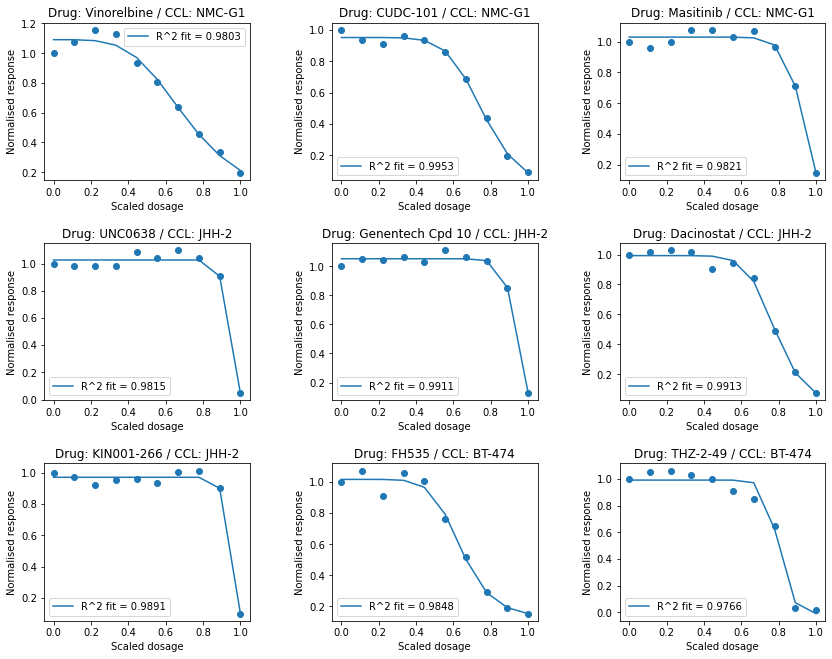

In [10]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 11330/11330 [00:48<00:00, 234.92it/s]


<function ll4R_4_param at 0x7fd0252d2c80>
R2>0: (11329, 45)
R2>0.9 10836
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 47.6 s, sys: 2.27 s, total: 49.9 s
Wall time: 48.6 s


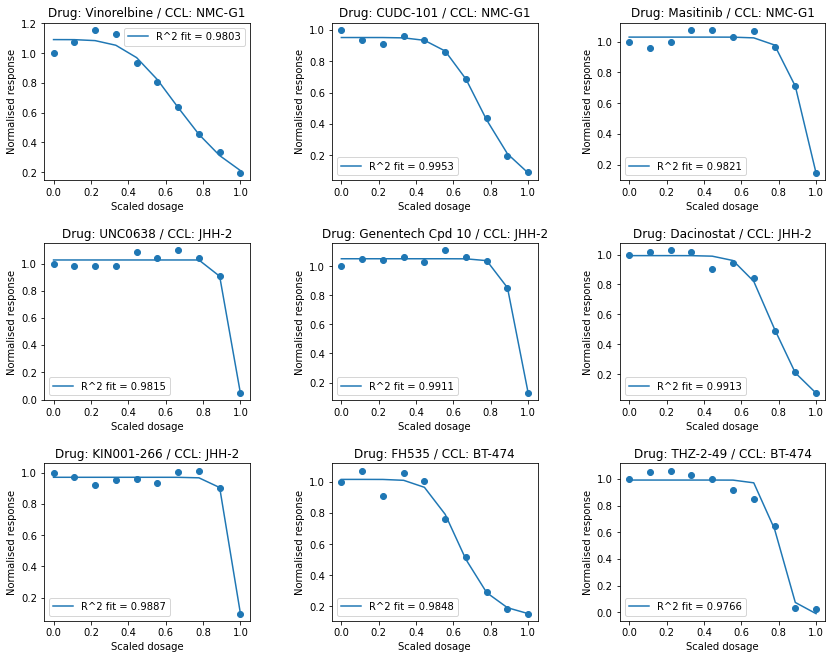

In [11]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 11329/11329 [00:56<00:00, 199.08it/s]


<function logLogist_3_param at 0x7fd0252d2d90>
R2>0: (11325, 47)
R2>0.9 10607
Figures titles: Index_DRUG_ID_COSMIC_ID (COSMIC_ID is a cell line)
CPU times: user 55.9 s, sys: 2.97 s, total: 58.9 s
Wall time: 57.3 s


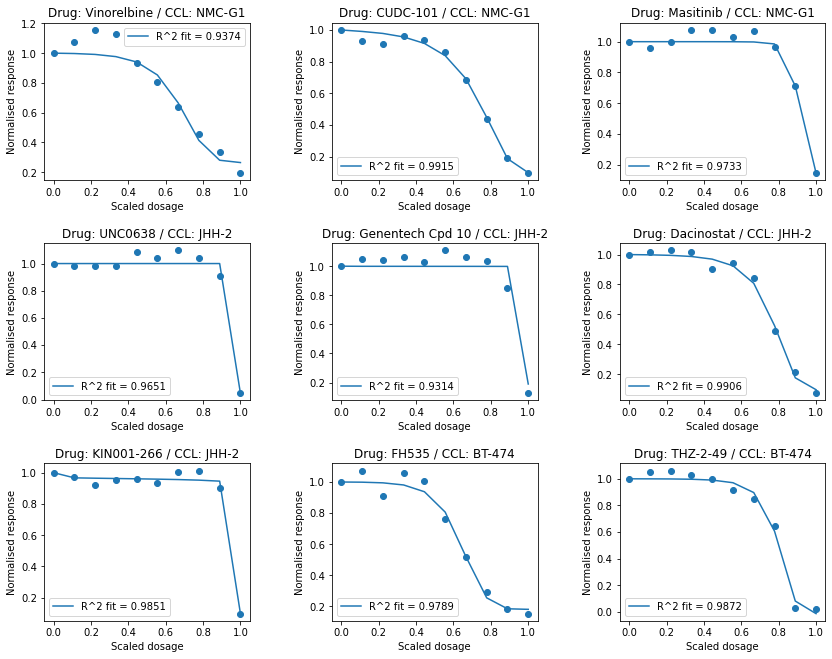

In [12]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = fitting_column(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
show_response_curves_with_fitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [13]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [14]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,logLogist_3_param_r2,fsigmoid_r2,ll4R_4_param_r2,sigmoid_2_param_r2,sigmoid_4_param_r2,logistic_4_param_r2,ll4_4_param_r2,sigmoid_3_param_r2,better_fitting
1,0.937392,0.935012,0.980302,0.935012,9.749048e-01,0.980306,0.980305,0.974226,logistic_4_param
2,0.991522,0.989093,0.995272,0.989093,4.094162e-08,0.995272,0.995272,0.994160,logistic_4_param
3,0.973334,0.973737,0.982129,0.973737,9.819163e-01,0.982129,0.982129,0.981304,logistic_4_param
4,0.965098,0.975088,0.981481,0.975088,9.814787e-01,0.981481,0.981481,0.981472,ll4R_4_param
5,0.931443,0.965127,0.991096,0.965127,9.910849e-01,0.991096,0.991096,0.991021,ll4_4_param


In [15]:
df["better_fitting"].value_counts()

sigmoid_4_param      3387
logLogist_3_param    3352
logistic_4_param     1522
ll4_4_param          1519
ll4R_4_param         1359
sigmoid_3_param       186
Name: better_fitting, dtype: int64

In [16]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
ll4_4_param,6232
logistic_4_param,6228
sigmoid_4_param,6215
ll4R_4_param,6212
logLogist_3_param,5356
sigmoid_3_param,4991
fsigmoid,3290
sigmoid_2_param,3243


In [17]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
ll4_4_param,9530
logistic_4_param,9529
ll4R_4_param,9518
sigmoid_4_param,9278
logLogist_3_param,8891
sigmoid_3_param,8759
fsigmoid,7028
sigmoid_2_param,6965


In [18]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,10836
ll4_4_param,10836
ll4R_4_param,10832
logLogist_3_param,10607
sigmoid_3_param,10557
sigmoid_4_param,10397
fsigmoid,9526
sigmoid_2_param,9488


In [19]:
df.shape

(11325, 48)

In [20]:
df.to_csv(_FOLDER_3+"fit_auc_02.csv", index=False)